# Employee Performance Model

**[Prashant Brahmbhatt](https://www.github.com/hashbanger)**

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.pyplot import rcParams

from collections import Counter

from warnings import filterwarnings
filterwarnings('ignore')

sns.set_style('darkgrid')

#### Importing the data

In [2]:
df = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


### Checking for Missing Values

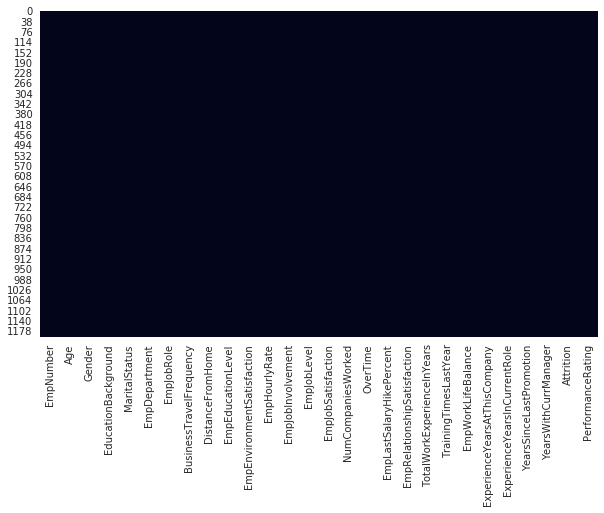

In [3]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar = False)
plt.show()

No missing entries

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

We can look for any uncanny entries in the columns.

In [5]:
for col in df.iloc[:,1:].columns:
    print(df[col].unique())
    print()

[32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]

['Male' 'Female']

['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']

['Single' 'Married' 'Divorced']

['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']

['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

[10 14  5 16  8  1 24  3 27 19  9  2  7  6 26 11 23 13 29 12  4 25 21 18
 20 17 22 28 15]

[3 4 2 5 1]

[4 2 1 3]

[ 55  42  48  73  84  32  54  67  63  81  49  99  57  96  44  86  83  61
  80  31  46  79  77 

There doesn't seem to be any concern for the irregular values.

## EDA

Looking at abstract stats for each variable

In [6]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
num_cols = [col for col in df.columns if df[col].dtype != 'O']

In [7]:
df[num_cols].agg(['skew','kurtosis','std','mean','min','median','max']).T

,skew,kurtosis,std,mean,min,median,max
Age,0.384145,-0.431000,9.087289,36.918333,18.0,36.0,60.0
DistanceFromHome,0.962956,-0.242017,8.176636,9.165833,1.0,7.0,29.0
EmpEducationLevel,-0.250974,-0.635594,1.044120,2.892500,1.0,3.0,5.0
EmpEnvironmentSatisfaction,-0.307665,-1.205577,1.090599,2.715833,1.0,3.0,4.0
EmpHourlyRate,-0.035165,-1.186891,20.211302,65.981667,30.0,66.0,100.0
EmpJobInvolvement,-0.557846,0.368670,0.707164,2.731667,1.0,3.0,4.0
EmpJobLevel,1.024053,0.386338,1.107836,2.067500,1.0,2.0,5.0
EmpJobSatisfaction,-0.324276,-1.223147,1.100888,2.732500,1.0,3.0,4.0
NumCompaniesWorked,1.048635,0.068863,2.469384,2.665000,0.0,2.0,9.0
EmpLastSalaryHikePercent,0.808654,-0.299741,3.625918,15.222500,11.0,14.0,25.0


### Shapiro-Wilk Normality Test

To summarize about the Normality of the Variables we can do the normality test.  
It will give us a good approximation about the features we have to modify before feeding into algorithms.

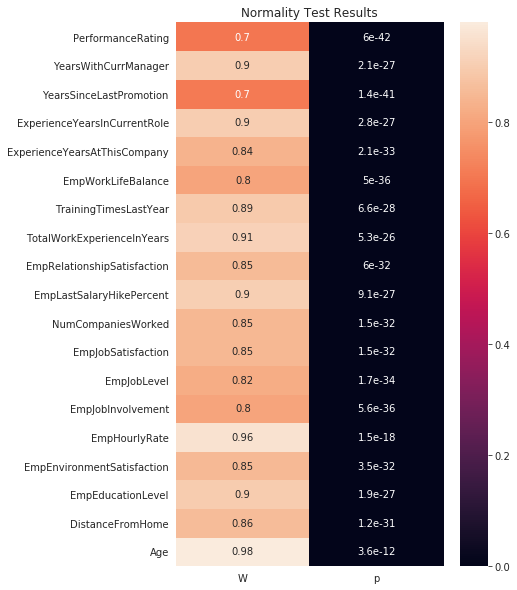

In [8]:
temp_list = []
for col in num_cols:
    temp_list.append(stats.shapiro(df[col]))
temp = pd.DataFrame(index= num_cols,columns=['W','p'], data= temp_list)
plt.figure(figsize=(6,10))
f = sns.heatmap(temp, annot= True)
f.set_ylim(0,19)
plt.title('Normality Test Results')
plt.show()

We can observe that None of the columns are highly skewed. Although we can have a look at the mildly skewed columns.   

Shapiro-Wilk test doesn't work very well with variables having large frequency of same values, or we could say variables having discrete nature.  
- The first Variable which seems skewed is the Target variable which is actually a discreet variable so it is understandable.
- The second column **YearsSinceLastPromotion** is also more of a discrete variable.

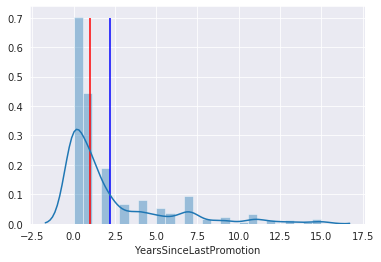

In [9]:
col = df['YearsSinceLastPromotion']
sns.distplot(col)
f = plt.vlines(x = [col.mean(),col.median()], ymin= 0.0000, ymax= 0.7, colors= ['blue','red'])
plt.show()

So we have got no problem with the normality.

### The Target Variable
Observing the value counts for target variables

In [10]:
# For stacked Barplot

# N = 1
# val_2 = df[df['PerformanceRating'] == 2]['PerformanceRating'].count()
# val_3 = df[df['PerformanceRating'] == 3]['PerformanceRating'].count()
# val_4 = df[df['PerformanceRating'] == 4]['PerformanceRating'].count()
# ind = np.arange(N)



# plt.figure(figsize=(16,2))
# plt.barh(ind, val_2, label='2s')
# plt.barh(ind, val_3, left= val_4, color = 'orange',label='3s')
# plt.barh(ind, val_4, left= val_3, label = '4s',color = 'g')
# plt.legend()
# plt.show()

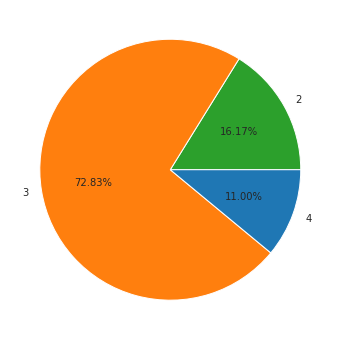

In [11]:
# PIE 

plt.figure(figsize=(6,6))
plt.pie(df['PerformanceRating'].value_counts(sort = False), labels= ['2','3','4'] ,autopct= '%1.2f%%', colors = ['tab:green','tab:orange','tab:blue'])
plt.show()

We can see that there are mostly **3** performance rating values.

## Univariate and Multivariate Analysis

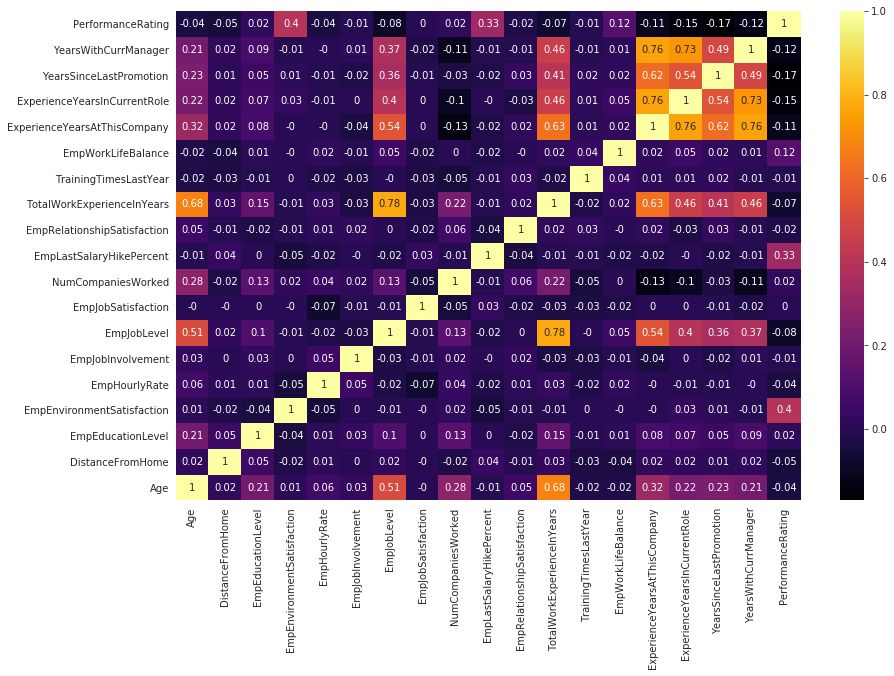

In [12]:
plt.figure(figsize=(14,9))
# mask = np.zeros_like(df.corr(), dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(df.corr().round(decimals=2), cmap= plt.cm.get_cmap('inferno'), annot = True)
ax.set_ylim(0,19)
plt.show()

Three noticeable correlations are between:  
- **ExperienceYearsAtThisCompany** with **ExperienceYearsInCurrentRole**.  
- **ExperienceYearsAtThisCompany** with **YearsWithCurrManager**.  
- **ExperienceYearsInCurrentRole** with **YearsWithCurrManager**.  
- **EmpJobLevel** with **TotalWorkExperienceInYears**.
- **Age** with **TotalWorkExperienceInYears**.

The first two relations are self explainable.  
The third correlation is a transitive result from the above two.  
The rest two correlations are visualised below.

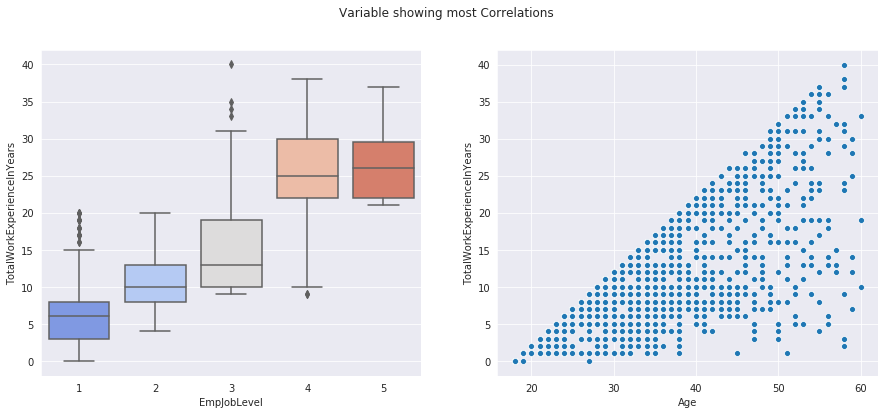

In [13]:
plt.figure(figsize=(15,6))
plt.suptitle('Variable showing most Correlations')
plt.subplot(1,2,1)
sns.boxplot(df['EmpJobLevel'], df['TotalWorkExperienceInYears'], palette= 'coolwarm')
plt.subplot(1,2,2)
sns.scatterplot(df['Age'], df['TotalWorkExperienceInYears'])
plt.show()

There is some variation in Total Experience with respect to the Job Level.  
Also the age is some factor for the experience in year and understandably so.

### - Age

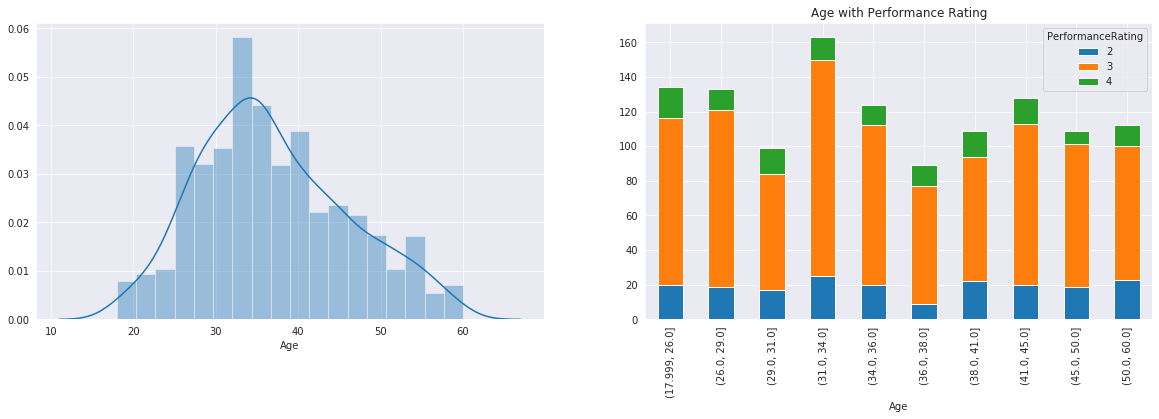

In [14]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.distplot(df['Age'])
# fig, ax = plt.subplots(figsize=(13,8))
ax = plt.subplot(2,2,2)
pd.crosstab(pd.qcut(df['Age'], q = 10), df['PerformanceRating']).plot(ax = ax, kind = 'bar', stacked = True)
plt.title('Age with Performance Rating')
plt.show()

### - Job Roles

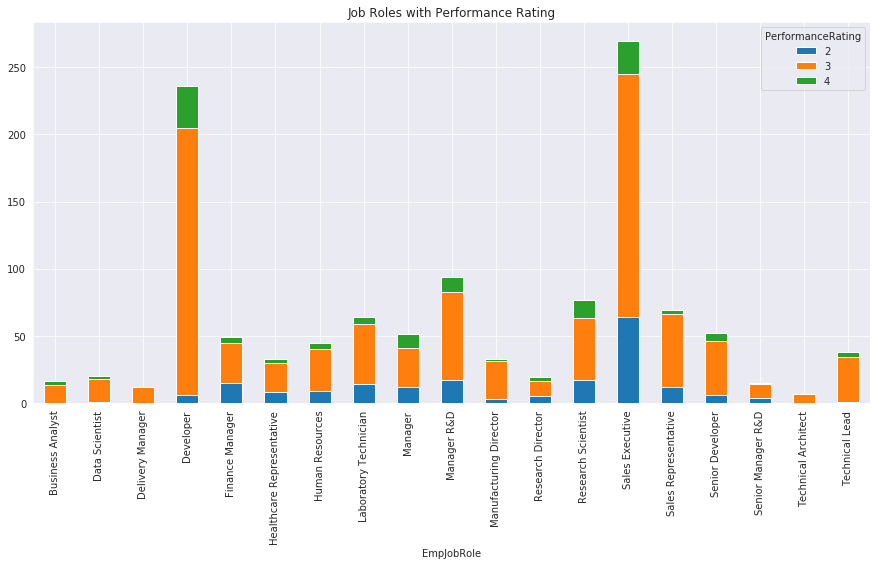

In [15]:
fig, ax = plt.subplots(figsize=(15,7))
pd.crosstab(df['EmpJobRole'], df['PerformanceRating']).plot(ax = ax, kind = 'bar', stacked = True)
plt.title('Job Roles with Performance Rating')
plt.show()

We can see that most of the avergae performers are in the range 30-34.  
However, this could be due to the most employees in data are  roughly in the same range as well.

The highest two Departments can be explored separately.

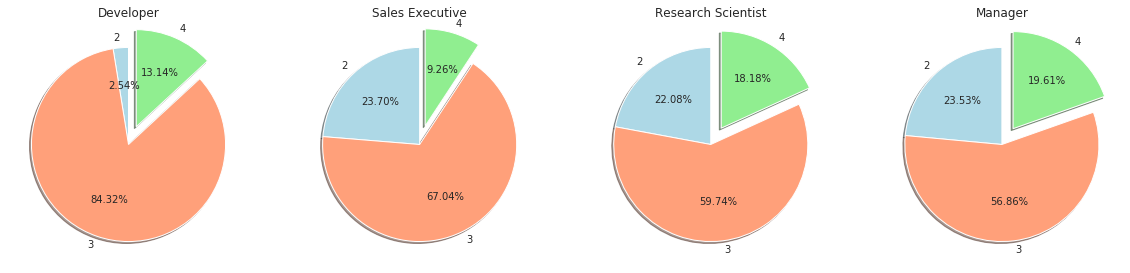

In [16]:
plt.figure(figsize=(20,6))
for i,jobrole in enumerate(['Developer','Sales Executive','Research Scientist', 'Manager']):
    plt.subplot(1,4,i+1)
    plt.pie(df[df['EmpJobRole'] == jobrole]['PerformanceRating'].value_counts(sort = False), labels= ['2','3','4'] \
            ,autopct= '%1.2f%%', colors = ['lightblue','lightsalmon','lightgreen'],shadow= True, explode=(0,0,0.20), startangle= 90)
    plt.title(jobrole)
plt.show()

We can clealy observe that the ***'Developer'*** job role stands out. 
- As it has least amount of 2 rated employees.  
- And most amount of average workers are in the same department.  
- It has reasonalbly good percentage of 4 rated emplyees.


________

### Encoding

In [117]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [118]:
ddf = pd.DataFrame()
for col in cat_cols:
    ddf[col] = encoder.fit_transform(df[col])
ddf[num_cols] = df[num_cols]

In [119]:
ddf = ddf.drop('EmpNumber',axis = 1)

## Feature Selection and Dimensionality Reduction

In [157]:
X = ddf.iloc[:,:-1]#.values
y = ddf.iloc[:, -1]#.values

Total Variance Explained by 9 components: 97.32%


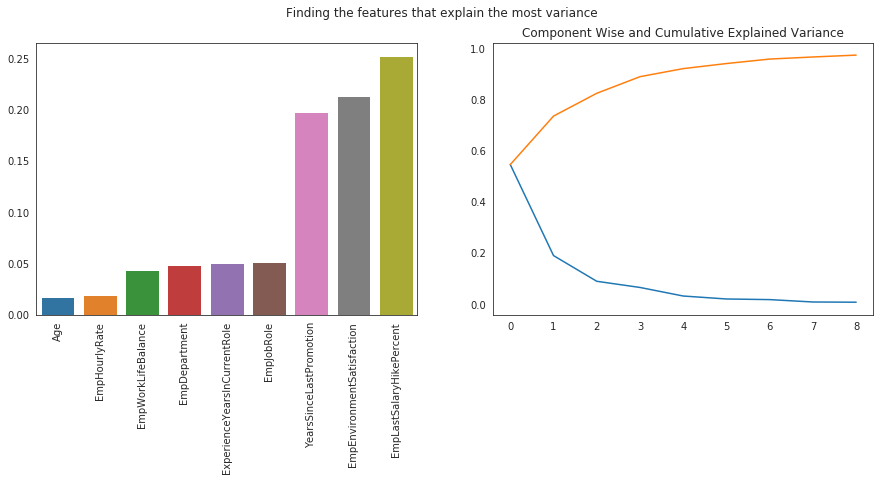

In [158]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA


plt.figure(figsize=(15,5))
plt.suptitle('Finding the features that explain the most variance')

regressor = RandomForestRegressor(max_depth= 10)
regressor.fit(X, y)

importances = regressor.feature_importances_
idx = importances.argsort()[-9:]

plt.subplot(1,2,1)
fig = sns.barplot(x = X.T.iloc[idx].index, y = importances[idx])
fig.set_xticklabels(fig.get_xticklabels(), rotation = 90)


#===================================================

pca = PCA(n_components= 9)
pca_res = pca.fit_transform(X.values)

plt.subplot(1,2,2)
plt.plot(range(9), pca.explained_variance_ratio_)
plt.plot(range(9), pca.explained_variance_ratio_.cumsum())
plt.title('Component Wise and Cumulative Explained Variance')
print("Total Variance Explained by 9 components: {:.2f}%".format(pca.explained_variance_ratio_.cumsum().max()*100))
plt.show()

Taking a peek at our PCA Components

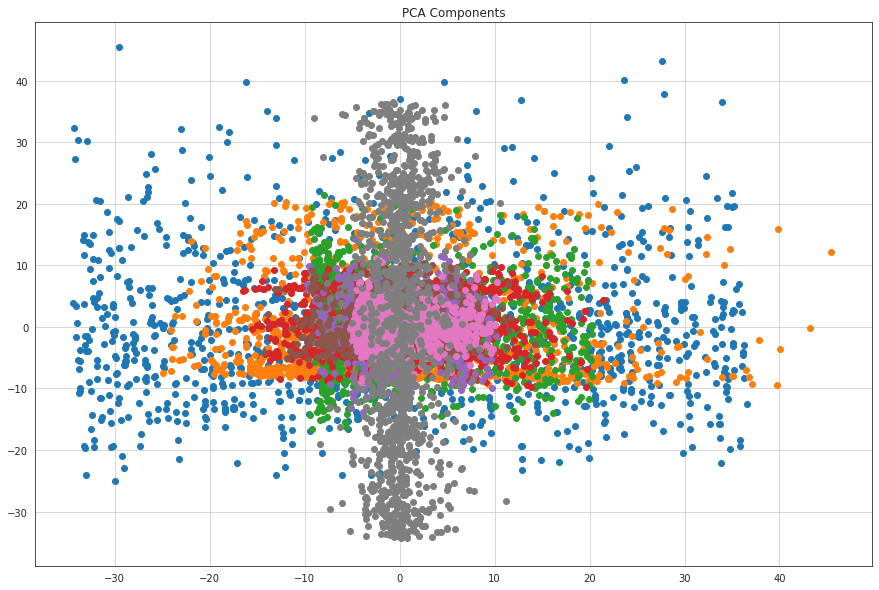

In [159]:
plt.figure(figsize=(15,10))
for i in range(8):
    plt.scatter(pca_res[:, i], pca_res[:, i+1]) if i !=7 else plt.scatter(pca_res[:, i], pca_res[:, 0])

plt.title('PCA Components')
plt.grid()
plt.show()

The ***pca.explained_variance_ratio_*** parameter returns a vector of the variance explained by each dimension.  
Thus ***pca.explained_varianceratio[i]*** gives the variance explained solely by the ***$i+1$st*** dimension.

***pca.explained_varianceratio_.cumsum()*** returns a vector x such that ***$x[i]$*** returns the cumulative variance explained by the first ***$i+1$*** dimensions.

- From the above observations we will pick 8 columns as suggested by the PCA.  
- The features will be the ones having highest peaks in the RF regressor.

In [160]:
feats = ['EmpLastSalaryHikePercent','EmpEnvironmentSatisfaction','YearsSinceLastPromotion','ExperienceYearsInCurrentRole',\
         'EmpDepartment', 'EmpWorkLifeBalance', 'EmpJobRole', 'Age', 'EmpHourlyRate']

In [161]:
X = ddf.loc[:,feats]

In [162]:
# X = ddf.iloc[:,:-1]#.values
y = ddf.iloc[:, -1]#.values

#### Scaling

In [163]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### Splitting 

In [164]:
from sklearn.model_selection import train_test_split,KFold
kfold = KFold(n_splits= 10, random_state= 101)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 101, test_size=.3)

Encoding the output labels to One Hot Encoding

In [165]:
dummy_y = pd.get_dummies(y_train)
dummy_y_test = pd.get_dummies(y_test)

## The Model

In [166]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

$Nh = Ns/(α * (No+Ni))$

Nh = number of hidden neurons.  
Ni = number of input neurons.  
No = number of output neurons.  
Ns = number of samples in training data set.  
α = an arbitrary scaling factor usually 2-10.  

In [196]:
print("Suggested Hidden Neurons: ",round(X_train.shape[0] / (3 * (9+3))))

Suggested Hidden Neurons:  23


In [205]:
model = Sequential()
model.add(Dense(18, input_dim=9, activation='relu'))
model.add(Dense(3, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [206]:
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

In [ ]:
hist = model.fit(x = X_train, y = dummy_y, batch_size = 5, epochs= 50, validation_data= [X_test, dummy_y_test], callbacks= [tbCallBack])

Train on 840 samples, validate on 360 samples
Epoch 1/50
840/840 [==============================] - 0s 526us/step - loss: 0.9543 - accuracy: 0.5512 - val_loss: 0.6792 - val_accuracy: 0.7750
Epoch 2/50
840/840 [==============================] - 0s 241us/step - loss: 0.6498 - accuracy: 0.7500 - val_loss: 0.5520 - val_accuracy: 0.7944
Epoch 3/50
840/840 [==============================] - 0s 209us/step - loss: 0.5598 - accuracy: 0.7833 - val_loss: 0.4984 - val_accuracy: 0.8139
Epoch 4/50
840/840 [==============================] - 0s 225us/step - loss: 0.5087 - accuracy: 0.8060 - val_loss: 0.4613 - val_accuracy: 0.8222
Epoch 5/50
840/840 [==============================] - 0s 234us/step - loss: 0.4758 - accuracy: 0.8143 - val_loss: 0.4360 - val_accuracy: 0.8306
Epoch 6/50
840/840 [==============================] - 0s 217us/step - loss: 0.4536 - accuracy: 0.8202 - val_loss: 0.4189 - val_accuracy: 0.8444
Epoch 7/50
840/840 [==============================] - 0s 244us/step - loss: 0.4355 - accur

Mean Train Loss: 0.36, Mean Train Accuracy: 85.13 %
Mean Test Loss: 0.38, Mean Test Accuracy: 85.95 %


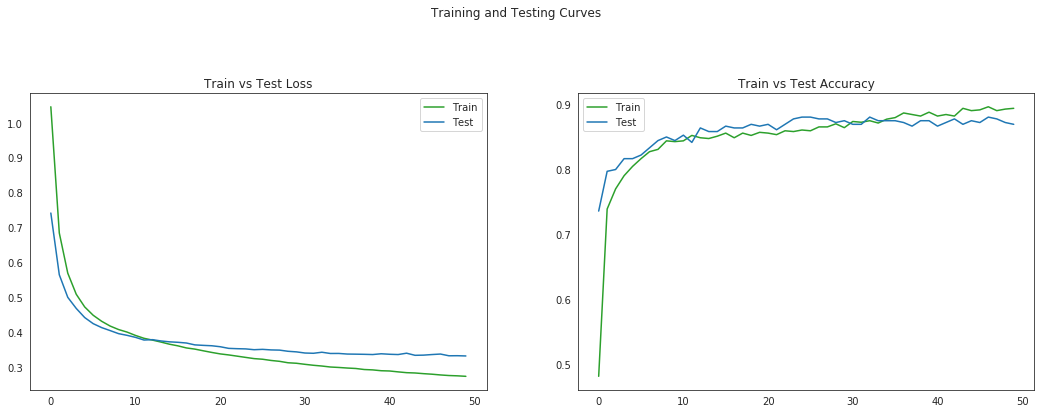

In [204]:
print("Mean Train Loss: {:.2f}, Mean Train Accuracy: {:.2f} %".format(np.mean(hist.history['loss']), np.mean(hist.history['accuracy'])*100))
print("Mean Test Loss: {:.2f}, Mean Test Accuracy: {:.2f} %".format(np.mean(hist.history['val_loss']), np.mean(hist.history['val_accuracy'])*100))

sns.set_style('white')
plt.figure(figsize=(18,12))
plt.suptitle('Training and Testing Curves')
plt.subplot(2,2,1)
plt.plot(hist.history['loss'], c = 'tab:green', label = 'Train')
plt.plot(hist.history['val_loss'], c= 'tab:blue', label = 'Test')
plt.title('Train vs Test Loss')
plt.legend()
plt.subplot(2,2,2)
plt.plot(hist.history['accuracy'], c= 'tab:green', label = 'Train')
plt.plot(hist.history['val_accuracy'], c= 'tab:blue', label = 'Test')
plt.title('Train vs Test Accuracy')
plt.legend()
plt.show()

***de nada!***